# Unit 6 | Assignment - What's the Weather Like?

Background:

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: "Duh. It gets hotter..." 

But, if pressed, how would you prove it? 




WeatherPy:

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls. 
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:


You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data. 
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.

See Example Solution for a reference on expected format.

In [1]:
#first load all the dependencies
from citipy import citipy
import random
import time
from config import api_key
random_city_lat_long = []

In [2]:
#lat max/min are 90/-90 and long max/min are 180/-180
max_lat = 90
min_lat = -90
max_long = 180
min_long = -180

In [3]:
#create a list to store random cities
cities = []

In [4]:
# loop through and pull 500 cities in the latitude and longitude range
for i in range(0, 500):
    lng = random.uniform(min_long, max_long)
    lat = random.uniform(min_lat, max_lat)
    city = citipy.nearest_city(lat, lng)
    city_data = f'{city.city_name},{city.country_code}'
    cities.append(city_data)

#check that the for loop work by setting a print check point

print("check point!")

check point!


In [5]:
len(cities)

500

In [6]:
import numpy as np
import openweathermapy
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import requests

#sample size to test data and not overload api
sample_size = 50
samples = np.array_split(cities, 10)

In [7]:
#take a look at what's in samples
print(samples)

[array(['boulder city,us', 'avarua,ck', 'diamantino,br', 'samusu,ws',
       'bredasdorp,za', 'kalanguy,ru', 'hobart,au', 'clyde river,ca',
       'illoqqortoormiut,gl', 'constitucion,mx', 'victoria,sc',
       'thinadhoo,mv', 'ushuaia,ar', 'sangin,af', 'salalah,om',
       'port lincoln,au', 'kismayo,so', 'wanaka,nz', 'laguna,br',
       'barrow,us', 'lebu,cl', 'kachiry,kz', 'puerto ayora,ec',
       'kavieng,pg', 'avarua,ck', 'rikitea,pf', 'aykhal,ru', 'broome,au',
       'stavyshche,ua', 'ushuaia,ar', 'ushuaia,ar', 'rikitea,pf',
       'busselton,au', 'mar del plata,ar', 'tsihombe,mg', 'taoudenni,ml',
       'ribeira grande,pt', 'bambous virieux,mu', 'bluff,nz',
       'shelburne,ca', 'butaritari,ki', 'ferry pass,us', 'cape town,za',
       'kapaa,us', 'jamestown,sh', 'cockburn harbour,tc', 'albany,au',
       'donnacona,ca', 'berbera,so', 'puerto ayora,ec'], dtype='<U24'), array(['port elizabeth,za', 'mataura,pf', 'nieuw amsterdam,sr',
       'mezen,ru', 'cayenne,gf', 'puerto ayora

In [8]:
# set params, (pull this from API documentation)
units = "imperial"

In [9]:
# create lists of the all the info we want to capture:
lat = []
long = []
temp = []
humidity = []
wind = []
clouds = []
city_name = []
city_country_code = []
city_id = []
date_time = []

#create a list of target cities
#target_city = 'kansas city,us'
target_cities = ['kansas city,sus', 'london,uk', 'ontario,ca', 'sao paulo,br', 'cape town,za']

In [10]:
#set counter
row_count = 0

for sample in samples:

    for row_count in range (0, len(sample)):

        target_city = sample[row_count]
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = f"{base_url}appid={api_key}&units={units}&q={target_city}"

        # Print log to check that the loop is working correctly
        print("Now retrieving city # " + str(row_count))
        row_count += 1

        response = requests.get(query_url)
        response_data = response.json()

        print(response_data)
        if response.status_code == 200:
            try:
                lat.append(response_data['coord']['lat'])
                long.append(response_data['coord']['lon'])
                temp.append(response_data['main']['temp_max'])
                humidity.append(response_data['main']['humidity'])
                wind.append(response_data['wind']['speed'])
                clouds.append(response_data['clouds']['all'])
                city_name.append(response_data['name'])
                city_id.append(response_data['id'])
                city_country_code.append(response_data['sys']['country'])
                date_time.append(response_data['dt'])
            except KeyError:
                print(f'We got a good response (status code: {response.status_code}), but did not receive good info. \
                | {target_city }')
        else:
            print(f'{row_count} row did not a successful repsonse')
    time.sleep(60)
print('done!')


Now retrieving city # 0
{'coord': {'lon': -114.83, 'lat': 35.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1018, 'humidity': 12, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 16093, 'wind': {'speed': 6.93, 'gust': 6.2}, 'clouds': {'all': 1}, 'dt': 1524344160, 'sys': {'type': 1, 'id': 2049, 'message': 0.0142, 'country': 'US', 'sunrise': 1524315437, 'sunset': 1524363532}, 'id': 5500539, 'name': 'Boulder City', 'cod': 200}
Now retrieving city # 1
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.68, 'pressure': 1027.38, 'humidity': 100, 'temp_min': 77.68, 'temp_max': 77.68, 'sea_level': 1027.62, 'grnd_level': 1027.38}, 'wind': {'speed': 11.79, 'deg': 51.0009}, 'rain': {'3h': 1.75862}, 'clouds': {'all': 76}, 'dt': 1524345163, 'sys': {'message': 0.004, 'country': 'CK', '

{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 57.57, 'pressure': 1023.41, 'humidity': 93, 'temp_min': 57.57, 'temp_max': 57.57, 'sea_level': 1026.93, 'grnd_level': 1023.41}, 'wind': {'speed': 15.03, 'deg': 1.50085}, 'clouds': {'all': 20}, 'dt': 1524345686, 'sys': {'message': 0.0038, 'country': 'CL', 'sunrise': 1524310034, 'sunset': 1524349107}, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
Now retrieving city # 21
{'coord': {'lon': 76.1, 'lat': 53.07}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 50.86, 'pressure': 1005.66, 'humidity': 53, 'temp_min': 50.86, 'temp_max': 50.86, 'sea_level': 1018.94, 'grnd_level': 1005.66}, 'wind': {'speed': 14.81, 'deg': 200.501}, 'clouds': {'all': 20}, 'dt': 1524345686, 'sys': {'message': 0.0046, 'country': 'KZ', 'sunrise': 1524267733, 'sunset': 1524319639},

{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1027, 'humidity': 82, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 5950, 'message': 0.0033, 'country': 'PT', 'sunrise': 1524294564, 'sunset': 1524343072}, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
Now retrieving city # 37
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1015, 'humidity': 78, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 6729, 'message': 0.0029, 'country': 'MU', 'sunrise': 1524277330, 'sunset': 1524318758}, 'id

{'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1010, 'humidity': 78, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1524342600, 'sys': {'type': 1, 'id': 4338, 'message': 0.0038, 'country': 'GF', 'sunrise': 1524302410, 'sunset': 1524346533}, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
Now retrieving city # 5
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1009, 'humidity': 55, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4355, 'message': 0.0036, 'country': 'EC', 'sunrise': 1524311830, 'sunset': 1524355356}, 'id': 3652764, 'na

{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 54.69, 'pressure': 1004.44, 'humidity': 97, 'temp_min': 54.69, 'temp_max': 54.69, 'sea_level': 1019.03, 'grnd_level': 1004.44}, 'wind': {'speed': 12.68, 'deg': 342.501}, 'rain': {'3h': 1.17962}, 'clouds': {'all': 100}, 'dt': 1524345132, 'sys': {'message': 0.0032, 'country': 'CL', 'sunrise': 1524310479, 'sunset': 1524348710}, 'id': 3896218, 'name': 'Castro', 'cod': 200}
Now retrieving city # 23
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 982, 'humidity': 75, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0035, 'country': 'AR', 'sunrise': 1524310631, 'sunset

{'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.37, 'pressure': 1008.25, 'humidity': 89, 'temp_min': 14.37, 'temp_max': 14.37, 'sea_level': 1008.73, 'grnd_level': 1008.25}, 'wind': {'speed': 14.25, 'deg': 33.5009}, 'clouds': {'all': 64}, 'dt': 1524345754, 'sys': {'message': 0.0041, 'country': 'RU', 'sunrise': 1524258854, 'sunset': 1524326670}, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
Now retrieving city # 41
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1017, 'humidity': 82, 'temp_min': 60.8, 'temp_max': 60.8}, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 6591, 'message': 0.0043, 'country': 'ZA', 'sunrise': 1524287298, 'sunset': 1524326882}, 'id': 1015776, 'name': 'Bredas

{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1015, 'humidity': 78, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 6729, 'message': 0.0555, 'country': 'MU', 'sunrise': 1524277348, 'sunset': 1524318768}, 'id': 934322, 'name': 'Mahebourg', 'cod': 200}
Now retrieving city # 8
{'cod': '404', 'message': 'city not found'}
9 row did not a successful repsonse
Now retrieving city # 9
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.92, 'pressure': 1028.76, 'humidity': 100, 'temp_min': 76.92, 'temp_max': 76.92, 'sea_level': 1028.75, 'grnd_level': 1028.76}, 'wind': {'speed': 8.55, 'deg': 4.00085}, 'rain': {'3h': 2.8227}, 'clouds'

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 983, 'humidity': 57, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4642, 'message': 0.0209, 'country': 'CL', 'sunrise': 1524311013, 'sunset': 1524346795}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Now retrieving city # 30
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1010, 'humidity': 78, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 4498, 'message': 0.0043, 'country': 'BR', 'sunrise': 1524299565, 'sunset': 1524342781}, 'id': 6320062,

{'coord': {'lon': 19.77, 'lat': -17.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 68.41, 'pressure': 903.52, 'humidity': 38, 'temp_min': 68.41, 'temp_max': 68.41, 'sea_level': 1026.08, 'grnd_level': 903.52}, 'wind': {'speed': 6.64, 'deg': 95.0009}, 'clouds': {'all': 12}, 'dt': 1524345821, 'sys': {'message': 0.0036, 'country': 'NA', 'sunrise': 1524286312, 'sunset': 1524328011}, 'id': 3353383, 'name': 'Rundu', 'cod': 200}
Now retrieving city # 0
{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 21.75, 'pressure': 1025.84, 'humidity': 82, 'temp_min': 21.75, 'temp_max': 21.75, 'sea_level': 1033.37, 'grnd_level': 1025.84}, 'wind': {'speed': 4.85, 'deg': 149.001}, 'clouds': {'all': 20}, 'dt': 1524344877, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1524240345, 'sunset': 1524301969}, 'id

{'coord': {'lon': 50.28, 'lat': -14.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.01, 'pressure': 1012.38, 'humidity': 99, 'temp_min': 77.01, 'temp_max': 77.01, 'sea_level': 1025.35, 'grnd_level': 1012.38}, 'wind': {'speed': 5.19, 'deg': 168.501}, 'rain': {'3h': 2.00873}, 'clouds': {'all': 92}, 'dt': 1524345883, 'sys': {'message': 0.0032, 'country': 'MG', 'sunrise': 1524278823, 'sunset': 1524320859}, 'id': 1071296, 'name': 'Antalaha', 'cod': 200}
Now retrieving city # 17
{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.11, 'pressure': 1027.87, 'humidity': 100, 'temp_min': 53.11, 'temp_max': 53.11, 'sea_level': 1028.96, 'grnd_level': 1027.87}, 'wind': {'speed': 22.75, 'deg': 252.001}, 'clouds': {'all': 76}, 'dt': 1524345688, 'sys': {'message': 0.0036, 'country': 'NZ', 'sunrise': 1524

{'coord': {'lon': -103.49, 'lat': 31.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1016, 'humidity': 13, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 330, 'gust': 9.3}, 'clouds': {'all': 1}, 'dt': 1524344100, 'sys': {'type': 1, 'id': 2698, 'message': 0.0043, 'country': 'US', 'sunrise': 1524313079, 'sunset': 1524360442}, 'id': 5528182, 'name': 'Pecos', 'cod': 200}
Now retrieving city # 34
{'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1012, 'humidity': 30, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 6220, 'message': 0.0035, 'country': 'DZ', 'sunrise': 1524288583, 'sunset': 1524335404}, 'id': 2508813,

{'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.3, 'pressure': 988.72, 'humidity': 35, 'temp_min': 66.3, 'temp_max': 66.3, 'sea_level': 1009.5, 'grnd_level': 988.72}, 'wind': {'speed': 22.53, 'deg': 320.501}, 'clouds': {'all': 0}, 'dt': 1524345948, 'sys': {'message': 0.0032, 'country': 'AR', 'sunrise': 1524309373, 'sunset': 1524346816}, 'id': 3863379, 'name': 'Mar del Plata', 'cod': 200}
Now retrieving city # 4
{'coord': {'lon': -5.72, 'lat': -15.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.92, 'pressure': 1028.11, 'humidity': 97, 'temp_min': 76.92, 'temp_max': 76.92, 'sea_level': 1028.14, 'grnd_level': 1028.11}, 'wind': {'speed': 12.91, 'deg': 110.501}, 'clouds': {'all': 92}, 'dt': 1524345948, 'sys': {'message': 0.0041, 'country': 'SH', 'sunrise': 1524292321, 'sunset': 152433

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 983, 'humidity': 57, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4642, 'message': 0.0209, 'country': 'CL', 'sunrise': 1524311013, 'sunset': 1524346795}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Now retrieving city # 21
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1021, 'humidity': 87, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 8195, 'message': 0.0042, 'country': 'AU', 'sunrise': 1524257414, 'sunset': 1524295665}, 'id': 216335

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 983, 'humidity': 57, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4642, 'message': 0.0209, 'country': 'CL', 'sunrise': 1524311013, 'sunset': 1524346795}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Now retrieving city # 38
{'cod': '404', 'message': 'city not found'}
39 row did not a successful repsonse
Now retrieving city # 39
{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.8, 'pressure': 1016, 'humidity': 85, 'temp_min': 24.8, 'temp_max': 24.8}, 'wind': {'speed': 3.36, 'deg': 200}, 'clouds': {'all': 92}, 'dt': 1524343800, 'sys': {'type': 1, 'id': 4805, 'me

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1009, 'humidity': 55, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4355, 'message': 0.0036, 'country': 'EC', 'sunrise': 1524311830, 'sunset': 1524355356}, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
Now retrieving city # 8
{'coord': {'lon': -94.76, 'lat': 39.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1022, 'humidity': 40, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 70, 'gust': 7.7}, 'clouds': {'all': 1}, 'dt': 1524340380, 'sys': {'type': 1, 'id': 1664, 'message': 0.0068, 'country': 'US', 'sunrise': 1524310272, 'sunset': 1524359071}, 'i

{'coord': {'lon': -122.69, 'lat': 58.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1009, 'humidity': 55, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 48279, 'wind': {'speed': 10.29, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 3278, 'message': 0.0042, 'country': 'CA', 'sunrise': 1524314288, 'sunset': 1524368514}, 'id': 5955902, 'name': 'Fort Nelson', 'cod': 200}
Now retrieving city # 28
{'cod': '404', 'message': 'city not found'}
29 row did not a successful repsonse
Now retrieving city # 29
{'coord': {'lon': -147.8, 'lat': 64.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.22, 'pressure': 1010, 'humidity': 83, 'temp_min': 32, 'temp_max': 33.8}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 260}, 'clouds': {'all': 1}, 'dt': 1524344280, 'sys': {'type': 1, 

{'coord': {'lon': -25.06, 'lat': 17.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1016, 'humidity': 72, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 6190, 'message': 0.0035, 'country': 'CV', 'sunrise': 1524295205, 'sunset': 1524340659}, 'id': 3374336, 'name': 'Porto Novo', 'cod': 200}
Now retrieving city # 45
{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1026, 'humidity': 72, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 10000, 'wind': {'speed': 4.7}, 'clouds': {'all': 40}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 5957, 'message': 0.0032, 'country': 'PT', 'sunrise': 1524293851, 'sunset': 1524342215}, 'id': 3372472, 'name': 

{'cod': '404', 'message': 'city not found'}
14 row did not a successful repsonse
Now retrieving city # 14
{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.75, 'pressure': 1001.93, 'humidity': 85, 'temp_min': 16.75, 'temp_max': 16.75, 'sea_level': 1006.66, 'grnd_level': 1001.93}, 'wind': {'speed': 12.68, 'deg': 243.501}, 'clouds': {'all': 88}, 'dt': 1524345755, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1524255021, 'sunset': 1524319902}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
Now retrieving city # 15
{'coord': {'lon': -161.76, 'lat': 60.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1000, 'humidity': 80, 'temp_min': 35.6, 'temp_max': 35.6}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1524343980, 'sys

{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.51, 'pressure': 1025.93, 'humidity': 100, 'temp_min': 81.51, 'temp_max': 81.51, 'sea_level': 1026.04, 'grnd_level': 1025.93}, 'wind': {'speed': 8.1, 'deg': 60.0009}, 'clouds': {'all': 8}, 'dt': 1524346083, 'sys': {'message': 0.0098, 'country': 'PF', 'sunrise': 1524327403, 'sunset': 1524369238}, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
Now retrieving city # 34
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 982, 'humidity': 75, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1524340800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0047, 'country': 'AR', 'sunrise': 1524310632, 'sunset': 1524345925}, 'id': 38333

Now retrieving city # 0
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.33, 'pressure': 1020.17, 'humidity': 100, 'temp_min': 67.33, 'temp_max': 67.33, 'sea_level': 1021.21, 'grnd_level': 1020.17}, 'wind': {'speed': 23.31, 'deg': 312.001}, 'rain': {'3h': 2.67616}, 'clouds': {'all': 56}, 'dt': 1524344879, 'sys': {'message': 0.0187, 'country': 'AU', 'sunrise': 1524264346, 'sunset': 1524304091}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
Now retrieving city # 1
{'coord': {'lon': 30.35, 'lat': 59.41}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1001, 'humidity': 84, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 7267, 'message': 0.0029, 'country': 'RU', 

{'coord': {'lon': 130.99, 'lat': -25.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1019, 'humidity': 36, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 8160, 'message': 0.0045, 'country': 'AU', 'sunrise': 1524260039, 'sunset': 1524300899}, 'id': 6355222, 'name': 'Yulara', 'cod': 200}
Now retrieving city # 19
{'cod': '404', 'message': 'city not found'}
20 row did not a successful repsonse
Now retrieving city # 20
{'cod': '404', 'message': 'city not found'}
21 row did not a successful repsonse
Now retrieving city # 21
{'coord': {'lon': 61.16, 'lat': 36.54}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1008, 'humidity': 40, 'temp_min': 68, 'temp_max': 68}, 'wind': {'speed': 2.24, 

{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 54.69, 'pressure': 1004.44, 'humidity': 97, 'temp_min': 54.69, 'temp_max': 54.69, 'sea_level': 1019.03, 'grnd_level': 1004.44}, 'wind': {'speed': 12.68, 'deg': 342.501}, 'rain': {'3h': 1.17962}, 'clouds': {'all': 100}, 'dt': 1524346084, 'sys': {'message': 0.0038, 'country': 'CL', 'sunrise': 1524310480, 'sunset': 1524348709}, 'id': 3896218, 'name': 'Castro', 'cod': 200}
Now retrieving city # 41
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.33, 'pressure': 1020.17, 'humidity': 100, 'temp_min': 67.33, 'temp_max': 67.33, 'sea_level': 1021.21, 'grnd_level': 1020.17}, 'wind': {'speed': 23.31, 'deg': 312.001}, 'rain': {'3h': 2.67616}, 'clouds': {'all': 56}, 'dt': 1524345954, 'sys': {'message': 0.0067, 'country'

{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.26, 'pressure': 1027.71, 'humidity': 94, 'temp_min': 16.26, 'temp_max': 16.26, 'sea_level': 1029.93, 'grnd_level': 1027.71}, 'wind': {'speed': 4.74, 'deg': 126.001}, 'clouds': {'all': 44}, 'dt': 1524346212, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1524245133, 'sunset': 1524307940}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
Now retrieving city # 8
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.33, 'pressure': 1020.17, 'humidity': 100, 'temp_min': 67.33, 'temp_max': 67.33, 'sea_level': 1021.21, 'grnd_level': 1020.17}, 'wind': {'speed': 23.31, 'deg': 312.001}, 'rain': {'3h': 2.67616}, 'clouds': {'all': 56}, 'dt': 1524345954, 'sys': {'message': 0.0067, 'country': 'AU', 'sunrise':

{'coord': {'lon': 129.48, 'lat': 28.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.89, 'pressure': 1028.6, 'humidity': 100, 'temp_min': 70.89, 'temp_max': 70.89, 'sea_level': 1031.95, 'grnd_level': 1028.6}, 'wind': {'speed': 13.69, 'deg': 126.001}, 'clouds': {'all': 64}, 'dt': 1524346214, 'sys': {'message': 0.0056, 'country': 'JP', 'sunrise': 1524257424, 'sunset': 1524304282}, 'id': 1855540, 'name': 'Naze', 'cod': 200}
Now retrieving city # 26
{'coord': {'lon': -61.27, 'lat': 16.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1015, 'humidity': 61, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 4145, 'message': 0.0043, 'country': 'GP', 'sunrise': 1524303936, 'sunset': 1524349306}, 'id'

{'cod': '404', 'message': 'city not found'}
44 row did not a successful repsonse
Now retrieving city # 44
{'coord': {'lon': -15.98, 'lat': 18.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.76, 'pressure': 1024.71, 'humidity': 100, 'temp_min': 65.76, 'temp_max': 65.76, 'sea_level': 1024.9, 'grnd_level': 1024.71}, 'wind': {'speed': 14.36, 'deg': 317.501}, 'clouds': {'all': 0}, 'dt': 1524346231, 'sys': {'message': 0.1629, 'country': 'MR', 'sunrise': 1524292965, 'sunset': 1524338542}, 'id': 2377450, 'name': 'Nouakchott', 'cod': 200}
Now retrieving city # 45
{'coord': {'lon': -66.38, 'lat': 50.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1017, 'humidity': 26, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 48279, 'wind': {'speed': 8.05, 'deg': 360, 'gust': 8.2}, 'clouds': {'all': 75}, 'dt': 1524344400,

{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1020, 'humidity': 88, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 4828, 'wind': {'speed': 3.36, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1524343980, 'sys': {'type': 1, 'id': 818, 'message': 0.0044, 'country': 'US', 'sunrise': 1524326236, 'sunset': 1524372032}, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
Now retrieving city # 12
{'coord': {'lon': 105.93, 'lat': 26.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.1, 'pressure': 871.58, 'humidity': 83, 'temp_min': 63.1, 'temp_max': 63.1, 'sea_level': 1015.5, 'grnd_level': 871.58}, 'wind': {'speed': 12.01, 'deg': 170.501}, 'clouds': {'all': 0}, 'dt': 1524346278, 'sys': {'message': 0.0037, 'country': 'CN', 'sunrise': 1524263216, 'sunset': 1524309791}, 'id': 1817968, 'name

{'coord': {'lon': 134.23, 'lat': 35.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 47.67, 'pressure': 989.2, 'humidity': 98, 'temp_min': 47.67, 'temp_max': 47.67, 'sea_level': 1034.95, 'grnd_level': 989.2}, 'wind': {'speed': 3.4, 'deg': 175.501}, 'clouds': {'all': 12}, 'dt': 1524345823, 'sys': {'message': 0.0083, 'country': 'JP', 'sunrise': 1524255754, 'sunset': 1524303682}, 'id': 1849892, 'name': 'Tottori', 'cod': 200}
Now retrieving city # 29
{'coord': {'lon': 23.05, 'lat': -34.04}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1017, 'humidity': 82, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 6549, 'message': 0.0034, 'country': 'ZA', 'sunrise': 1524286539, 'sunset': 1524326195}, 'id': 988698, 'name': 'Knysna

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 984, 'humidity': 70, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 23.04, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 4642, 'message': 0.003, 'country': 'CL', 'sunrise': 1524311013, 'sunset': 1524346794}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Now retrieving city # 47
{'coord': {'lon': -61.51, 'lat': 16.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1015, 'humidity': 61, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1524344400, 'sys': {'type': 1, 'id': 4145, 'message': 0.0037, 'country': 'GP', 'sunrise': 1524303981, 'sunset': 1524349376}, 'id'

In [11]:
print(lat)
print(temp)
print(humidity)
print(wind)
print(clouds)
print(city_name)
print(city_country_code)
print(city_id)
print(date_time)

[35.98, -21.21, -14.4, -34.53, 51.01, -42.88, 70.47, 23.99, -4.62, 0.53, -54.81, 32.07, 17.01, -34.72, -44.7, 39.51, -37.62, 53.07, -0.74, -2.57, -21.21, -23.12, 65.95, -17.97, 50.78, -54.81, -54.81, -23.12, -33.64, -46.43, 22.68, 38.52, -20.34, -46.6, 44.08, 3.07, 30.51, -33.93, 22.08, -15.94, -35.02, 46.68, 10.44, -0.74, -33.92, 5.88, 65.85, 4.94, -0.74, -1.13, -53.16, 61.92, 42.84, 65.28, 68.06, 17.98, -2.92, -23.12, -25.24, -42.88, -21.21, -23.12, -42.48, -54.81, 32.73, 66.04, 55.74, 64.73, 54.43, -42.48, -14.66, -54.81, 71.64, -9.8, -42.78, -2.54, 29.6, 19.71, -34.67, 73.51, -34.53, -35.1, -24.87, 27.97, 71.98, -33.86, -23.12, -33.64, -33.59, -9.8, -0.74, 38.52, -35.02, -41.87, -7.93, -20.41, -23.12, 61.6, 69.44, -20.52, -34.72, -35.02, -33.64, 62.23, -30.17, -53.16, -34.53, 39.95, -3.66, -33.69, -21.21, -21.21, -53.16, -3.71, 23.99, 27.87, 13.5, 63.05, -9.17, 59.7, -19.55, 64.86, 24.89, 69.7, 65.61, -35.02, -35.66, -17.91, 69.7, 40.6, 70.47, 22.57, 22.08, -38.38, 63.75, -33.64, -

In [14]:
#city_data_df= pd.DataFrame.from_(sales, columns = [lat,long,temp,humidity,wind,clouds,city_name,city_id,city_country_code])

data_tuples = list(zip(lat,long,temp,humidity,wind,clouds,city_name,city_id,city_country_code))

city_data_df = pd.DataFrame(data_tuples, columns=['lat','long','temp','humidity','wind','clouds','city_name','city_id','city_country_code'])

city_data_df.head(10)

,lat,long,temp,humidity,wind,clouds,city_name,city_id,city_country_code
0,35.98,-114.83,80.60,12,6.93,1,Boulder City,5500539,US
1,-21.21,-159.78,77.68,100,11.79,76,Avarua,4035715,CK
2,-14.40,-56.44,82.86,71,3.96,0,Diamantino,3464724,BR
3,-34.53,20.04,60.80,82,5.82,0,Bredasdorp,1015776,ZA
4,51.01,116.52,24.27,68,3.85,0,Kalanguy,2023298,RU
5,-42.88,147.33,51.80,87,5.82,0,Hobart,2163355,AU
6,70.47,-68.59,24.80,79,9.17,1,Clyde River,5924351,CA
7,23.99,-104.67,86.00,9,5.82,40,Constitucion,4011743,MX
8,-4.62,55.45,80.60,88,4.70,75,Victoria,241131,SC
9,0.53,72.93,85.15,100,13.80,76,Thinadhoo,1337610,MV


# City Latitude vs. Max Temperature Chart

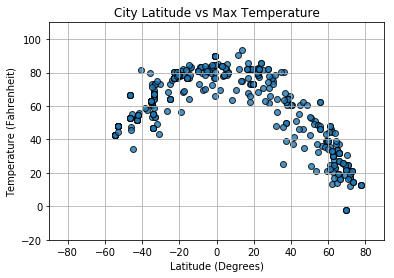

In [19]:

# Build a scatter plot for each data type
plt.scatter(city_data_df["lat"],
            city_data_df["temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="City")

# Incorporate the other graph properties
chart_title = f'City Latitude vs Max Temperature'
plt.title(chart_title)
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 110])
plt.savefig("lat.png")
plt.show()

# Latitude vs. Humidity

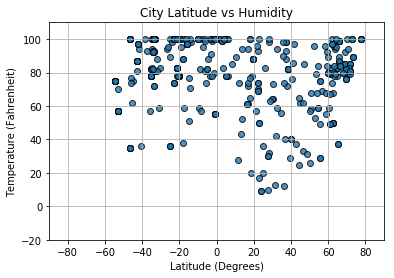

In [20]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["lat"],
            city_data_df["humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="City")

# Incorporate the other graph properties
chart_title = f'City Latitude vs Humidity'
plt.title(chart_title)
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 110])
plt.savefig("latvs.hum.png")
plt.show()

# Latitude vs. Cloud

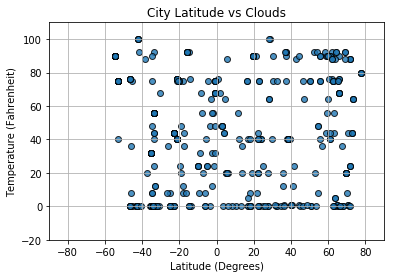

In [21]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["lat"],
            city_data_df["clouds"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="City")

# Incorporate the other graph properties
chart_title = f'City Latitude vs Clouds'
plt.title(chart_title)
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 110])
plt.savefig("latvs.cloud.png")
plt.show()

# Latitude vs. Windspeed

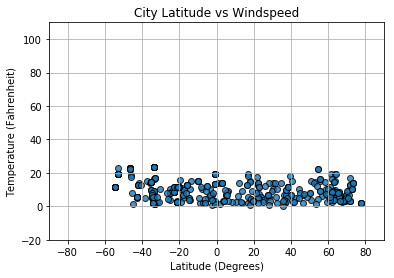

In [22]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["lat"],
            city_data_df["wind"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="City")

# Incorporate the other graph properties
chart_title = f'City Latitude vs Windspeed'
plt.title(chart_title)
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 110])
plt.savefig("latvs.wind.png")
plt.show()

In [23]:
city_data_df.to_csv("WeatherPy.csv")